<h1 id="0" style='font-size:42px; text-align:center; font-family: Eras Demi ITC;
                background-color:#b4e1eb; border: 8px solid #6c9596; padding:10px; 
                border-radius:25px'> Introduction</h1>

<h2 style="font-family: Eras Demi ITC"> Objectives</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px'> In this notebook I did a Exploratory Data Analysis on a job titles dataset to end up with insights. Also, I used Machine Learning to predict a wage for a job using key skills, experience required and the industry field. I hope you like!</div>

<h2 style="font-family: Eras Demi ITC"> Technologies and Techniques used</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px'> 
    <li><b>-</b> <b>Pandas</b> and <b>NumPy</b> for data manipulation;</li>
    <li><b>-</b> <b>Matplotlib</b> and <b>Seaborn</b> for data visualization;</li>
    <li><b>-</b> <b>Scikit-learn</b> for Machine Learning;</li>
    <li><b>-</b> Techniques for better data visualization using <b>graphic personalization</b>;</li>
    <li><b>-</b> Techniques for <b>handling string data</b> and <b>processing</b> it for Machine Learning;</li>
    <li><b>-</b> Techniques for <b>optimization of Machine Learning model</b> with hyperparams and KFold;</li>
</div>

<h2 style="font-family: Eras Demi ITC"> Summary</h2>
<hr style="height:6px;background-color:#6c9596">

<div id="summary" style="font-family:Eras Demi ITC; background-color:#b4e1eb; 
                        padding: 20px 20px; border-radius: 20px; line-height:1.8;
                        border: 8px solid #6c9596">
<p style="font-size: 24px"><a href="#1">● Imports</a></p>
<p style="font-size: 24px"><a href="#2">● Understading the Data</a></p>    
<p style="font-size: 24px"><a href="#3">● Role and Salary</a></p>
<p style="font-size: 24px"><a href="#4">● Key Skills</a></p>
<p style="font-size: 24px"><a href="#5">● Years of Experience </a></p>
<p style="font-size: 24px"><a href="#6">● The Job Industry </a></p>
<p style="font-size: 24px"><a href="#7">● Regression Model</a></p>
<p style="font-size: 24px"><a href="#8">● Conclusion</a></p></div>

<div id="1" style='font-size:48px; text-align:center; font-family: Eras Demi ITC;
                background-color:#b4e1eb; border: 8px solid #6c9596; 
                   border-radius:25px'> Imports </div>

In [1]:
# Data Manipulation
import numpy as np 
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='../input/font-eras-demi/ERASDEMI.TTF')

# Filter Warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/font-eras-demi/ERASDEMI.TTF
/kaggle/input/predicting-job-titles-from-resumes/jobss.csv


<div id="2" style='font-size:48px; text-align:center; font-family: Eras Demi ITC;
                background-color:#b4e1eb; border: 8px solid #6c9596; 
                border-radius:25px'> Understading the Data</div>

<h2 style="font-family: Eras Demi ITC"> Reading the Data</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px'> Reading the data and analyzing the columns values, changing if necessary.</div>

In [2]:
jobs_data = pd.read_csv('../input/predicting-job-titles-from-resumes/jobss.csv')

In [3]:
jobs_data.describe()

,Unnamed: 1,Longitude,Latitude,sal
count,0.0,473.000000,473.000000,500.000000
mean,NaN,75.988498,21.089736,4224.594000
std,NaN,14.397788,7.080071,1598.716696
min,NaN,-79.030572,-8.123729,1510.000000
25%,NaN,73.854454,17.360589,2864.250000
50%,NaN,77.121215,19.075990,4213.000000
75%,NaN,77.590082,28.428262,5623.000000
max,NaN,121.097753,46.314475,6991.000000


In [4]:
jobs_data.drop('Unnamed: 1', axis=1, inplace=True)

In [5]:
jobs_data.head()

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855
1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639
2,Trainee Research/ Research Executive- Hi- Tec...,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156
3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059
4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347


In [6]:
jobs_data.isna().sum()

Job Title                  11
Job Experience Required     0
Key Skills                  0
Role Category              37
Location                   11
Functional Area            11
Industry                   11
Role                       14
Longitude                  27
Latitude                   27
sal                         0
dtype: int64

<div style="background-color:#b4e1eb; padding:20px; border-radius:35px 10px; line-height: 45px">
    <div style="font-family: Eras ITC; font-size:16px">
        <p> - There's a <b>column with just null data</b>, must have it droped </p>
        <p> - There are rows that some of their data are null, so it is more efficient to keep it and complete with the most common for the column or with "Other" for string type column.</p>
    </div>
</div>

<div id="3" style='font-size:48px; text-align:center; font-family: Eras Demi ITC;
                background-color:#b4e1eb; border: 8px solid #6c9596; 
                border-radius:25px'> Role and Salary</div>

<h2 style="font-family: Eras Demi ITC"> Grouping the role and showing the average wage</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px'> Grouping the role and showing the average wage</div>

In [7]:
grouped_role = jobs_data.groupby('Role').mean().reset_index().sort_values('sal', ascending=False)

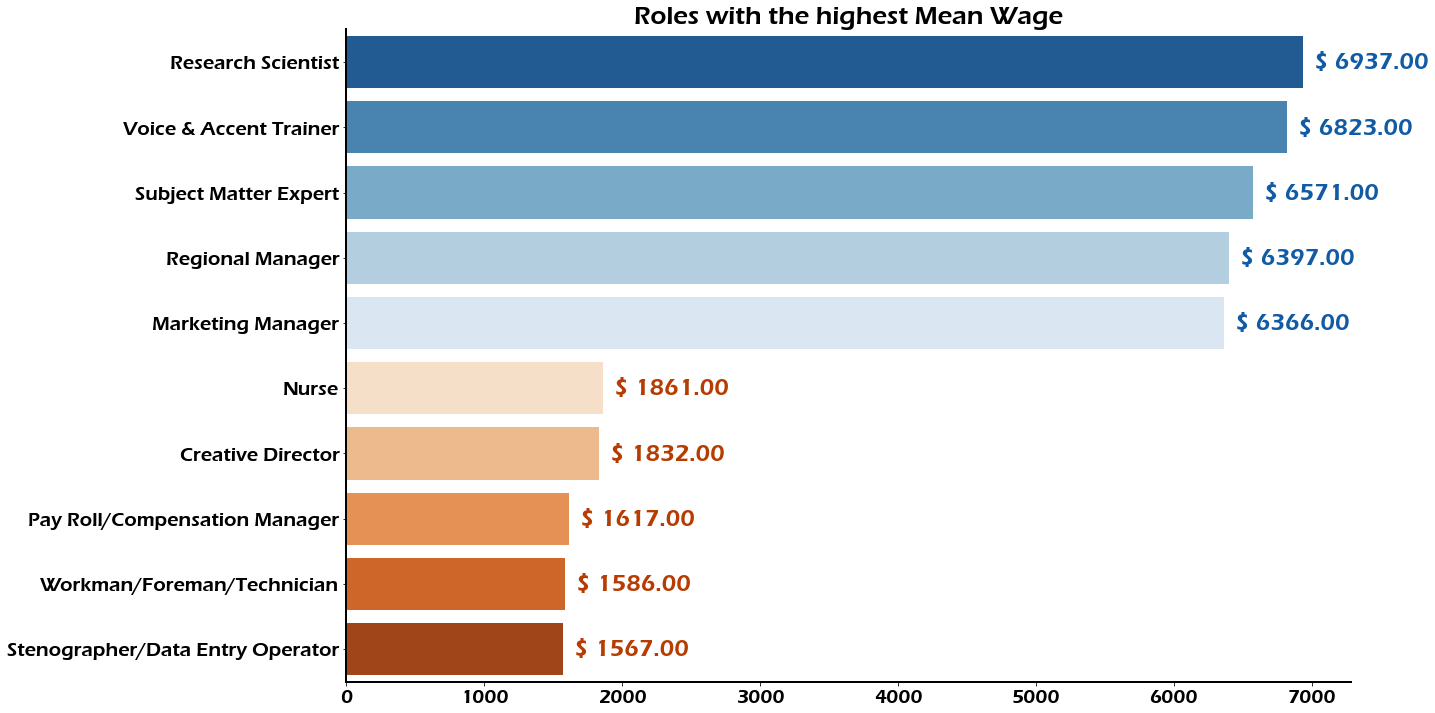

In [8]:
high_low_pay = pd.concat([grouped_role.head(), grouped_role.tail()])
palette = sns.color_palette('Blues_r', 5) + sns.color_palette('Oranges', 5)

ax = sns.barplot(data = high_low_pay, x = 'sal', y = 'Role', palette=palette) 
ax.figure.set_size_inches(18, 12)
ax.set_title('Roles with the highest Mean Wage', fontsize=26, font=font)
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(fontsize=20, font=font)
plt.yticks(fontsize=20, font=font)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(linewidth = 2)
ax.spines['bottom'].set(linewidth = 2)

i = 0
for index, row in high_low_pay.iterrows():
    text = "$ %.2f" % row['sal']
    color = palette[0] if i < 5 else palette[-1]
    x = row['sal'] + 80
    plt.text(s=text, y = i + 0.1, x=x, color=color, font=font, fontsize=24)
    i+=1


plt.show()

<div id="4" style='font-size:48px; text-align:center; font-family: Eras Demi ITC;
                background-color:#b4e1eb; border: 8px solid #6c9596;
                border-radius:25px'> Key Skills</div>

<h2 style="font-family: Eras Demi ITC"> Analyzing and Preparing the Key Skills</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px;line-height: 45px'> 
    <p>Analyzing <b>each skill of the Key Skills list by splitting it by "|".</b></p>
    <p>Preprocessing the Data, finding <b>null</b> or <b>invalid values.</b></p>
</div>

In [9]:
skills_splitted = np.array(jobs_data['Key Skills'].str.lower().str.split('|').values)
key_skill_vector = list()

for line in skills_splitted:
    line_key_skills = [skill.lstrip() for skill in line]    
    key_skill_vector += line_key_skills    

In [10]:
print("Before duplicates ->", len(key_skill_vector))

key_skill_vector = list(set(key_skill_vector))

print("After removing duplicates ->", len(key_skill_vector))

Before duplicates -> 4036
After removing duplicates -> 1790


In [11]:
jobs_data[jobs_data["Key Skills"].str.contains('c+\+')]

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
305,iOS Game Developer,3 - 8 yrs,c++| development| gaming| C| software| HTML| ...,Programming & Design,"Faridabad,Gurgaon,Mumbai","IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer,77.20056,28.407032,1860


In [12]:
# Replacing in the key skills vector "c++" to "c+\+"
key_skill_vector[key_skill_vector.index('c++')] = "c+\+"

<div style="background-color:#b4e1eb; padding:20px; border-radius:35px 10px; line-height: 45px">
    <div style="font-family: Eras ITC; font-size:16px">
        <p> - <b>The key skill "c++" problem</b>: the method .str.contains() from pandas uses regex to find the rows where it is true, however, "++" could be interpreted as a functional character, so it needed to be replaced by "c+\+".</p>
        <p> - <b>The function below finds the rows that contains the skill</b>, iterating for each skill and concatenating with a DataFrame skill_data that it is returned. <b>The minimum appearences argument filters by the minimum rows that contains the skill</b>, I find the number of 3 is a great number, it filters the specific skills.</p>
    </div>
</div>

In [13]:
def key_skill_wage(skills, minimum_appearences=3):
    skills_data = dict()

    for skill in skills:
        # Rows that contain the skill
        skill_rows = jobs_data[jobs_data["Key Skills"].str.contains(skill)]

        if skill_rows.shape[0] < minimum_appearences:
            continue
        
        skills_data[skill] = skill_rows.sal.mean()
    
    # Processing the DataFrame
    skills_data = pd.DataFrame([skills_data]).T.reset_index()
    skills_data.columns = ["skill", "skill_mean_wage"]
    skills_data["skill"] = skills_data.skill.str.title()
    
    return skills_data

In [14]:
more_relevant_skills = key_skill_wage(key_skill_vector, 3)
more_relevant_skills.head(3)

,skill,skill_mean_wage
0,Building,3945.875
1,Distributor,5365.000
2,Monitoring,4103.000


In [15]:
more_relevant_skills.sort_values("skill_mean_wage", ascending=False, inplace=True)

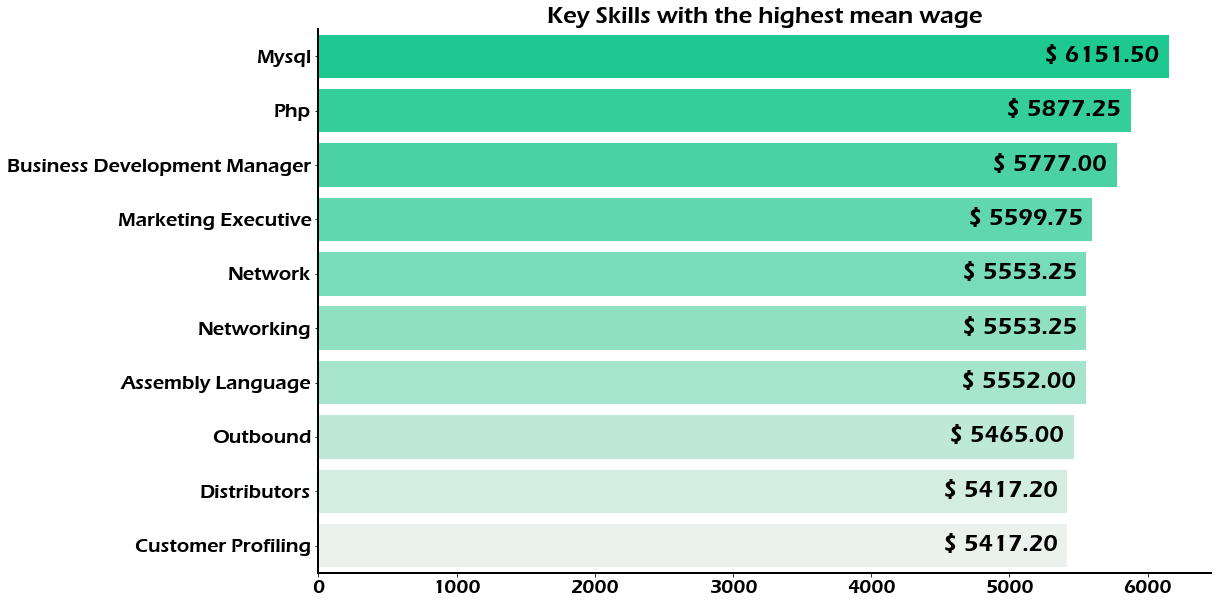

In [16]:
palette = sns.color_palette("light:#00e699", 10)[::-1]

ax = sns.barplot(data = more_relevant_skills.head(10), 
                 x = "skill_mean_wage", y = "skill", palette=palette)
ax.figure.set_size_inches(16, 10)

ax.set_title("Key Skills with the highest mean wage", fontsize=24, font=font)
ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(fontsize=20, font=font)
plt.yticks(fontsize=20, font=font)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(linewidth = 2)
ax.spines['bottom'].set(linewidth = 2)

i = 0
for index, row in more_relevant_skills.head(10).iterrows():
    text = "$ %.2f" % row['skill_mean_wage']
    x = row['skill_mean_wage'] - 900
    plt.text(s=text, y = i + 0.1, x=x, font=font, fontsize=24)
    i+=1

plt.show()

<h2 style="font-family: Eras Demi ITC"> Vectorizing the data for Machine Learning</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px;line-height: 45px'> 
    <p>Now, it needs the data to be vectorized, <b>so each skill will be a different column with a value being 0 (don't have the skill) or 1 (have the skill)</b>, so for each row there will be a vector containing 0s and 1s.</p>
    <p><b>In order to find whether a row has the skill, it uses the method .str.contains() from pandas</b>, the method acts like the operator LIKE from SQL.</p>
</div>

In [17]:
numerical_skill_vector = list()

for index in skills_splitted:
    vector = np.zeros(len(key_skill_vector))
    
    for skill in index:
        # Searchs for the skill in the skills vector and adds 1 in the index of the row vector
        if skill.lstrip() == "c++":
            skill_index = key_skill_vector.index("c+\+")
        else:
            skill_index = key_skill_vector.index(skill.lstrip())
            
        vector[skill_index] += 1
    
    numerical_skill_vector.append(vector)
    
numerical_skill_vector = pd.DataFrame(numerical_skill_vector, columns = key_skill_vector)

In [18]:
numerical_skill_vector.shape

(500, 1790)

In [19]:
numerical_skill_vector.head(3)

,unix operating system,service delivery,network elements,diploma,sales development,website analysis,quality inspection,microstrategy,networking sales,change management,...,c+\+,sterling integrator,support executive,electronic trading,statistics,sterling,development,ieee,archiving,google adwords
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div style="background-color:#b4e1eb; padding:20px; border-radius:35px 10px">
    <div style="font-family: Eras ITC; font-size:16px">
        <p> - Now, there's a vector for each key skill, ready to be used by regression model. </p>
    </div>
</div>

<div id="5" style='font-size:48px; text-align:center; font-family: Eras Demi ITC;
                background-color:#b4e1eb; border: 8px solid #6c9596; 
                border-radius:25px'> Years of Experience </div>

<h2 style="font-family: Eras Demi ITC"> Analyzing the years of experience</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px; line-height: 45px'> Dividing the years of experience in minimum indicated years of experience and "maximum", creating the recommended interval from data, even though there aren't minimum or maximum. This method will work better than a categorical transformation of the column.</div>

In [20]:
most_common = jobs_data['Job Experience Required']\
                        .value_counts()\
                        .keys()[0]\
                        .split(" ")

most_common = [int(i) for i in most_common if i.isnumeric()]
most_common

[2, 7]

<div style="background-color:#b4e1eb; padding:20px; border-radius:35px 10px; line-height: 45px">
    <div style="font-family: Eras ITC; font-size:16px">
        <p> - The most common required interval of experience is <b>2 to 7 years</b>, the rows that don't have data will be completed by the most common.</p>
        <p> - <b>There are rows that don't have numeric data, it's filled by "vide" or "Not Mentioned"</b>, as showed below.</p>
        <p> - In order to find the interval of years of experience, <b>it splitted the columns by " "</b>, so the numeric itens will be the first and the third. It will find these numeric itens by using the function <b>.isnumeric()</b>, it doesn't just get the first and third item because of values of length 1 or 2, mentioned before ("vide").</p>
        <p> - The final result is a list of lists, with the first value being the minimum and the second the maximum.</p>
    </div>
</div>

In [21]:
jobs_data['Job Experience Required']

0      5 - 10 yrs
1       2 - 5 yrs
2       0 - 1 yrs
3       0 - 5 yrs
4       2 - 5 yrs
          ...    
495     2 - 7 yrs
496     5 - 8 yrs
497     4 - 9 yrs
498     0 - 2 yrs
499     2 - 5 yrs
Name: Job Experience Required, Length: 500, dtype: object

In [22]:
experience_data = jobs_data['Job Experience Required'].str.split(" ").values
years_of_experience = list()

print("Non numeric values:\n")
for row in experience_data:
    row_data = [int(item) for item in row if item.isnumeric()]
    
    # If the years of experience are empty because of non numeric items, it completes with the most common
    if row_data == []:
        print(row)
        row_data = [int(most_common[0]), int(most_common[1])]
    
        
    years_of_experience.append(row_data)

Non numeric values:

['vide']
['vide']
['Not', 'Mentioned']
['vide']
['vide']
['vide']
['vide']
['vide']
['vide']
['vide']
['vide']
['vide']


In [23]:
# List of lists
years_of_experience[:5]

[[5, 10], [2, 5], [0, 1], [0, 5], [2, 5]]

In [24]:
years_of_experience = np.array(years_of_experience)
min_exp, max_exp = years_of_experience[:, 0], years_of_experience[:, 1]

In [25]:
exp_data = jobs_data[["sal"]]
exp_data['min_exp'] = min_exp
exp_data['max_exp'] = max_exp
exp_data.head()

,sal,min_exp,max_exp
0,3855,5,10
1,2639,2,5
2,2156,0,1
3,4059,0,5
4,5347,2,5


In [26]:
exp_data.describe()

,sal,min_exp,max_exp
count,500.000000,500.000000,500.000000
mean,4224.594000,3.406000,6.964000
std,1598.716696,3.268414,4.154663
min,1510.000000,0.000000,0.000000
25%,2864.250000,1.000000,4.000000
50%,4213.000000,2.000000,6.000000
75%,5623.000000,5.000000,8.000000
max,6991.000000,20.000000,27.000000


<div style="background-color:#b4e1eb; padding:20px; border-radius:35px 10px; line-height: 45px">
    <div style="font-family: Eras ITC; font-size:16px">
        <p> - <b>There are outliers like the minimum of experience of 20 years</b>, but it's possible, the same way <b>maximum experience of 0 years</b>, referring to starting jobs. The boxplot below shows that in an easy way of visualization.</p>
        <p> - Also, the data for years of experience is already<b> ready to be used by regression model</b>.</p>
    </div>
</div>

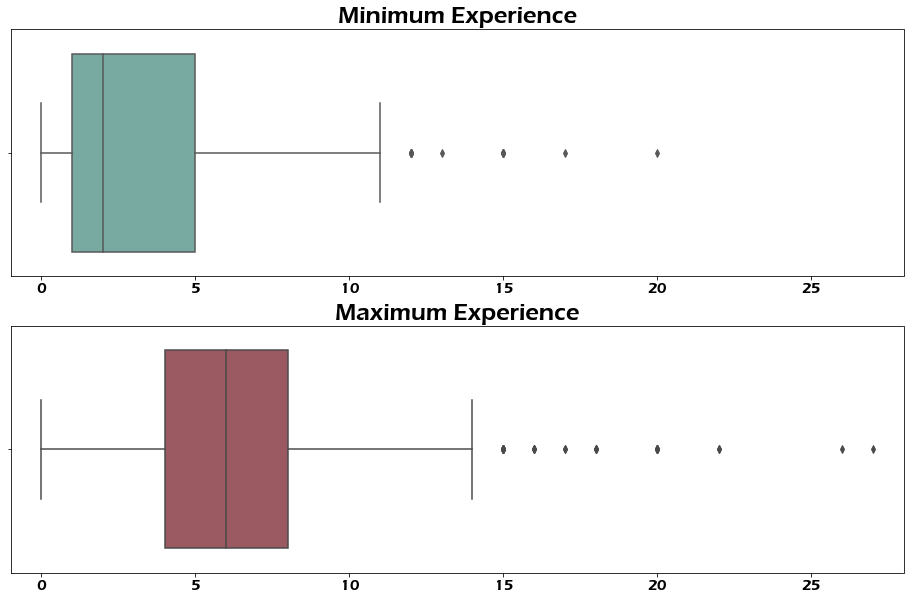

In [27]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
ax = sns.boxplot(data = exp_data, x = "min_exp", color="#70b2a8")
ax.set_title("Minimum Experience", fontsize=24, font=font)
ax.set_xlabel("")
plt.xticks(font=font, fontsize=16)
plt.xlim(-1, 28)

plt.subplot(2, 1, 2)
ax = sns.boxplot(data = exp_data, x = "max_exp", color="#a64f59")
ax.set_title("Maximum Experience", fontsize=24, font=font)
ax.set_xlabel("")
plt.xticks(font=font, fontsize=16)
plt.xlim(-1, 28)

plt.show()

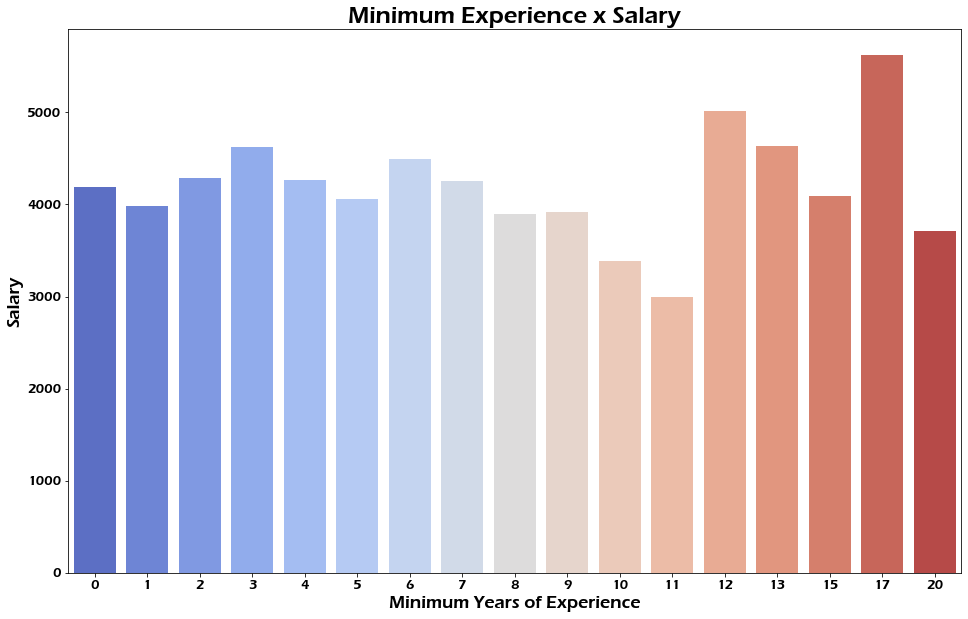

In [28]:
ax = sns.barplot(data = exp_data.groupby("min_exp").mean().reset_index(), 
                  x = "min_exp", y = "sal", palette = "coolwarm")

ax.figure.set_size_inches(16, 10)
ax.set_title("Minimum Experience x Salary", fontsize=24, font=font)
ax.set_ylabel("Salary", fontsize=18, font=font)
ax.set_xlabel("Minimum Years of Experience", fontsize=18, font=font)

plt.xticks(font=font, fontsize=14)
plt.yticks(font=font, fontsize=14)


plt.show()

<div style="background-color:#b4e1eb; padding:20px; border-radius:35px 10px">
    <div style="font-family: Eras ITC; font-size:16px;line-height:45px">
        <p> - <b>The data don't contain enough rows with more than 10 years of experience required</b>, so the graph gives the impression of constant salary among the years of working. <b>The lack of data with many years required is understandable, since the most common is until 7 years</b>, which companies consider enough for high positions.</p>
    </div>
</div>

<div id="6" style='font-size:48px; text-align:center; font-family: Eras Demi ITC;
                background-color:#b4e1eb; border: 8px solid #6c9596;
                border-radius:25px'> The Job Industry </div>

<h2 style="font-family: Eras Demi ITC"> Analyzing industry of the jobs</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px; line-height: 45px'> Does it have an industry that is more valuable than the others? Does the difference appears even with same experience level?</div>

In [29]:
industry_data = jobs_data.join(exp_data[["min_exp", "max_exp"]])
industry_data.head(2)

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal,min_exp,max_exp
0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855,5,10
1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639,2,5


In [30]:
industry_for_row = list(industry_data['Industry'].fillna("Other").str.split(","))

<div style="background-color:#b4e1eb; padding:20px; border-radius:35px 10px; line-height: 45px">
    <div style="font-family: Eras ITC; font-size:16px">
        <p> - There were null data in industry column, so <b>it got replaced by "Other"</b>.</p>
        <p> - The method to find the industry is the same for the skill, except from the spliter, that now is the comma. It creates a flatten list with each industry.</p>
    </div>
</div>

In [31]:
#Flatten the list
industry_fields_list = list()

for item_list in industry_for_row:
    itens = [item.lstrip() for item in item_list]
    industry_fields_list += itens

industry_fields_list[:5]

['Advertising', 'PR', 'MR', 'Event Management', 'IT-Software']

In [32]:
print("Before ->", len(industry_fields_list))
industry_fields_list = list(set(industry_fields_list))
print("After removing duplicates ->", len(industry_fields_list))

Before -> 1148
After removing duplicates -> 120


In [33]:
def industry_wage(industries, minimum_appearences=3):
    industry_data = pd.DataFrame([])
    
    for industry in industries:
        industry_rows = jobs_data[jobs_data["Industry"].fillna("Other")\
                                  .str.contains(industry)]
        industry_rows['industry'] = industry
        
        if industry_rows.shape[0] < minimum_appearences:
            continue

        industry_data = pd.concat([industry_data, industry_rows])
    
    return industry_data

In [34]:
industry_fields = industry_wage(industry_fields_list, 5)
industry_fields = industry_fields.join(exp_data[["min_exp", "max_exp"]])

In [35]:
group_by_industry = industry_fields.groupby("industry").mean()\
                                   .reset_index().sort_values("sal", ascending=False)
group_by_industry.head(3)

,industry,Longitude,Latitude,sal,min_exp,max_exp
39,Pharma,82.107259,18.197349,5319.875,2.375,6.25
12,Clinical Research,82.107259,18.197349,5319.875,2.375,6.25
8,Biotech,82.107259,18.197349,5319.875,2.375,6.25


In [36]:
most_least_industry = pd.concat([group_by_industry.head(6), group_by_industry.tail(6)])
palette = sns.color_palette("light:#0095ed", 6)[::-1] + sns.color_palette("light:#d2c29d", 6)

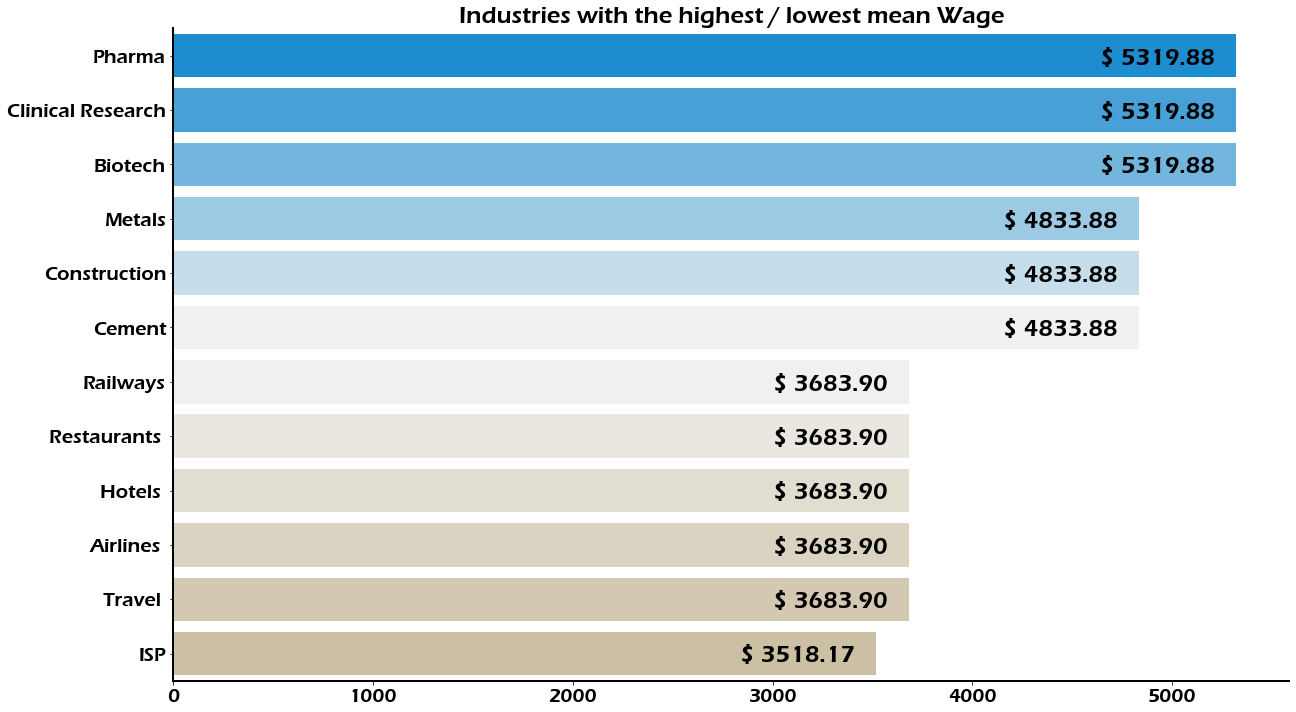

In [37]:
ax = sns.barplot(data = most_least_industry, x = "sal", y = "industry", palette=palette, dodge=False)
ax.figure.set_size_inches(20, 12)

ax.set_title("Industries with the highest / lowest mean Wage", fontsize=24, font=font)
ax.set_xlabel("")
ax.set_ylabel("")
plt.xticks(fontsize=20, font=font)
plt.yticks(fontsize=20, font=font)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(linewidth = 2)
ax.spines['bottom'].set(linewidth = 2)

i = 0
for index, row in most_least_industry.iterrows():
    text = "$ %.2f" % row['sal']
    x = row['sal'] - 680
    plt.text(s=text, y = i + 0.15, x=x, font=font, fontsize=24)
    i+=1

plt.show()

<div style="background-color:#b4e1eb; padding:20px; border-radius:35px 10px; line-height: 45px">
    <div style="font-family: Eras ITC; font-size:16px">
        <p> - The medical field receives the highest mean wage, mainly in research area. In the other hand, fields related to tourism have less mean wage.</p>
        <p> - There are duplicates mean minimum experience for industry field, so I ordered by the min_exp and found the unique values, then select the first three and the last three values. Thereafter I find the rows that contained each of minimum experience unique values and grouped into a graph.</p>
    </div>
</div>

In [38]:
temp = group_by_industry.sort_values("min_exp", ascending=False)
temp['min_exp'] = temp.min_exp.round(2)

In [39]:
most_least_exp_ind = list(temp['min_exp'].unique()[:3]) + list(temp['min_exp'].unique()[-3:])
most_least_exp_ind

[7.38, 7.25, 7.17, 2.08, 2.07, 1.83]

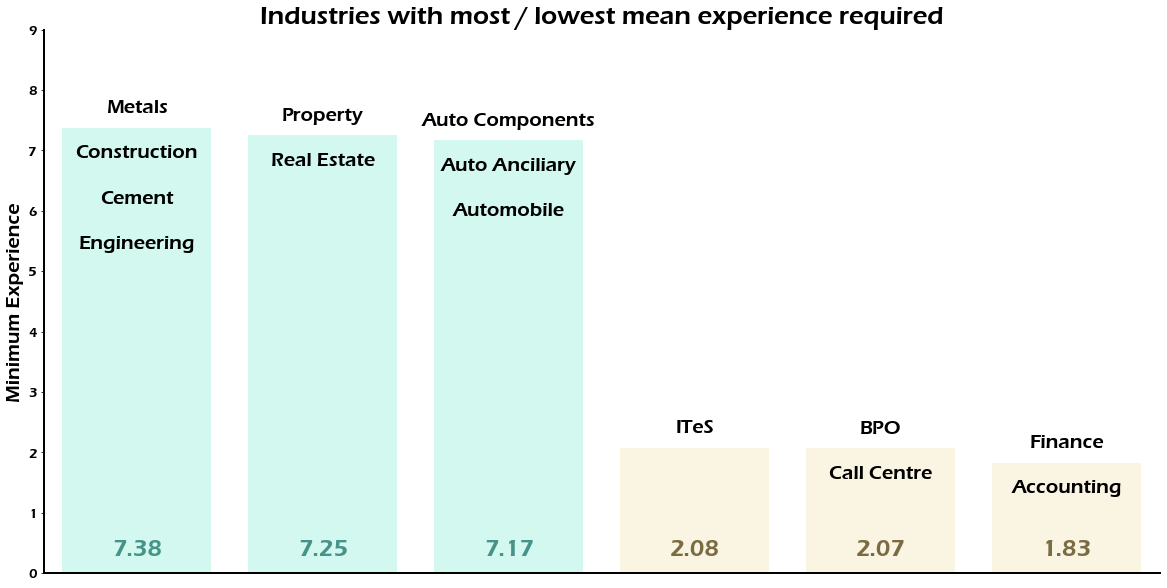

In [40]:
ax = sns.barplot(np.arange(len(most_least_exp_ind)), most_least_exp_ind, 
                 dodge=False, alpha=0.35, palette = ["#6fffdf"] * 3 + ["#ffe7a1"] * 3)

ax.figure.set_size_inches(20, 10)
ax.set_title("Industries with most / lowest mean experience required", font=font, fontsize=26)
ax.set_ylabel("Minimum Experience", font=font, fontsize=20)

for i, exp in enumerate(most_least_exp_ind):
    industry_for_exp = temp.query("min_exp == %f" % exp)['industry'].tolist()
    
    # Industry Names
    y = exp + 0.25
    for industry in industry_for_exp:
        plt.text(s=industry, x=i, y=y, 
                 font=font, fontsize=20, ha="center")
        y -= 0.75
    
    # Experience Text
    color = "#796b42" if i > 2 else "#489389"
    plt.text(s=exp, x=i, y = 0.3, ha="center", 
             font=font, fontsize=24, color=color)
    
        
            
plt.ylim(0, 9)
plt.xticks([])
plt.yticks(font=font, fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(linewidth = 2)
ax.spines['bottom'].set(linewidth = 2)

plt.show()

<div style="background-color:#b4e1eb; padding:20px; border-radius:35px 10px; line-height: 45px">
    <div style="font-family: Eras ITC; font-size:16px">
        <p> - Unexpectedly the industry fields that require the most minimum mean experience aren't from the medical area. <b>The engineering field, including mechanical and civil</b>, is the area that requires the most experience.</p>
        <p> - Financial area and client support are the industry fields that requires the least experience.</p>
    </div>
</div>

<h2 style="font-family: Eras Demi ITC"> Vectorizing the industry data</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px; line-height: 45px'> Turning the industry of each row into a vector containing 0 or 1 to use in the regression model.</div>

In [41]:
numerical_industry_vector = list()

for index in industry_for_row:
    vector = np.zeros(len(industry_fields_list))
    
    for industry in index:
        industry_index = industry_fields_list.index(industry.lstrip())
        vector[industry_index] += 1
    
    numerical_industry_vector.append(vector)
    
numerical_industry_vector = pd.DataFrame(numerical_industry_vector, columns = industry_fields_list)

In [42]:
numerical_industry_vector.head()

,Accounting / Finance,Accessories,Foods,Property,Courier,PR,Garments,Restaurants,Interior Design,Switchgears,...,Transportation,Software Services,Accounting,Engineering,IT-Software / Software Services,Sports,Broking,Insurance,Social Services,Finance
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div id="7" style='font-size:48px; text-align:center; font-family: Eras Demi ITC;
                background-color:#b4e1eb; border: 8px solid #6c9596;
                border-radius:25px'> Regression Model </div>

<h2 style="font-family: Eras Demi ITC"> Preparing the Data and Finding the best Hyper Params</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px; line-height: 45px'> Dividing the data for train and test and finding the best hyper params for the Random Forest Regressor in order to build a pipeline.</div>

In [43]:
numerical_exp_vector = exp_data[['min_exp', 'max_exp']]
numerical_exp_vector.head(1)

,min_exp,max_exp
0,5,10


In [44]:
X = pd.concat([numerical_skill_vector,
               numerical_industry_vector,
               numerical_exp_vector], axis=1)

y = jobs_data.sal

In [45]:
SEED = 4040
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 1912)
(125, 1912)
(375,)
(125,)


In [47]:
rfr = RandomForestRegressor(random_state=SEED)

params = {
    "max_depth":[3, 5, 10, 20, 25],
    "min_samples_split":[2, 10, 32, 64, 128, 256],
    "min_samples_leaf":[1, 10, 32, 64, 128, 256],
}

cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

search = RandomizedSearchCV(rfr, params, n_iter=48, cv=cv, random_state=SEED)

In [48]:
search.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=4040, shuffle=True),
                   estimator=RandomForestRegressor(random_state=4040),
                   n_iter=48,
                   param_distributions={'max_depth': [3, 5, 10, 20, 25],
                                        'min_samples_leaf': [1, 10, 32, 64, 128,
                                                             256],
                                        'min_samples_split': [2, 10, 32, 64,
                                                              128, 256]},
                   random_state=4040)

In [49]:
print("Best Params:", search.best_params_)

Best Params: {'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 5}


In [50]:
best_rfr = search.best_estimator_

<h2 style="font-family: Eras Demi ITC"> Visualizing the Prediction</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px; line-height: 45px'> Validating the best model and testing the generalization with the test values prediction. Visualizing the prediction using the minimum experience feature.</div>

In [51]:
y_pred = best_rfr.predict(x_test)
print("Test Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))

Test Mean Squared Error: 2396379.76


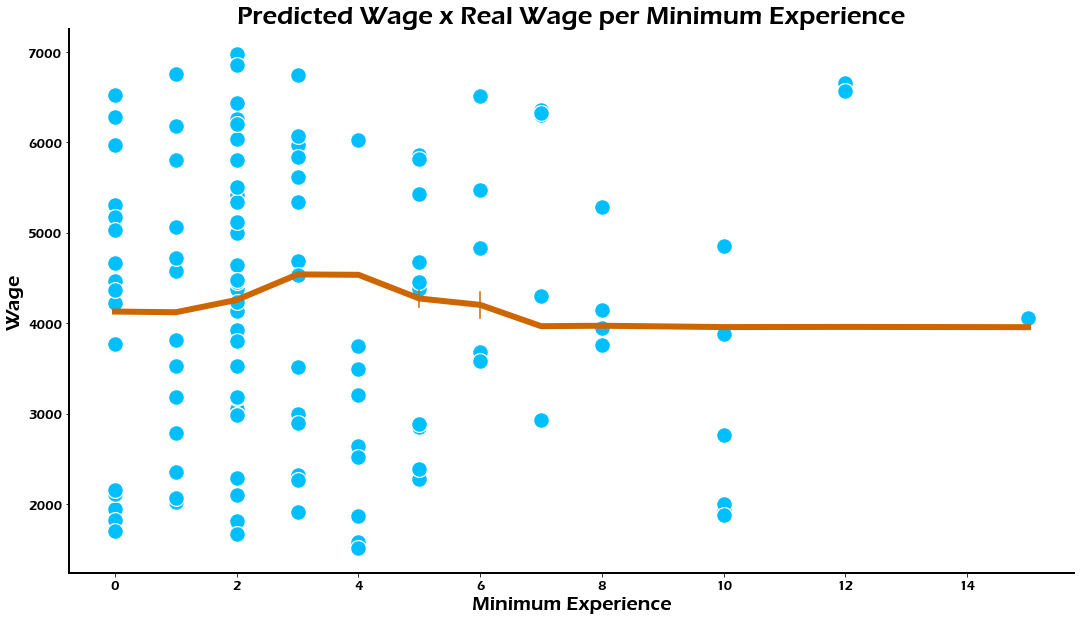

In [52]:
ax = sns.scatterplot(x = x_test['min_exp'], y = y_test, s=250, color="#00bfff")
sns.lineplot(x = x_test['min_exp'], y = y_pred, color="#cd6600", lw=6, err_style="bars")

ax.figure.set_size_inches(18, 10)

ax.set_title("Predicted Wage x Real Wage per Minimum Experience", font=font, fontsize=26)
ax.set_xlabel("Minimum Experience", font=font, fontsize=20)
ax.set_ylabel("Wage", font=font, fontsize=20)

plt.xticks(font=font, fontsize=14)
plt.yticks(font=font, fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set(linewidth = 2)
ax.spines['bottom'].set(linewidth = 2)

plt.show()

<div id="8" style='font-size:48px; text-align:center; font-family: Eras Demi ITC;
                background-color:#b4e1eb; border: 8px solid #6c9596; 
                border-radius:25px'> Conclusion </div>

<h2 style="font-family: Eras Demi ITC">Regression Model</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px; line-height: 45px'> As showed before, the lack of data for jobs with more than 10 years of required experience interferes directly in the regression model, giving the impression of constant wage after 10 years of experience.</div>

<h2 style="font-family: Eras Demi ITC"> Analyzing Data</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px; line-height: 45px'> 
    <p><b>-</b> Medical industry fields have the highest average wage, like pharma and clinical research at the same time that don't require the most experience. In the other hand, fields related to tourism have the lowest average wage.<p>
    <p><b>-</b> Financial area and client support are the industry fields that requires the least experience, most of them are entry level job.<p>
    <p><b>-</b> The most common experience required is 2 years. The lack of data for jobs with more than 10 years of required experience is understandable, because the most common "maximum" recommended required experience is 7 years, which companies consider enough for high position jobs.<p>
    <p><b>-</b> The key skills MySQL and Php are among the jobs that have the highests average salaries.<p>
</div>

<h2 style="font-family: Eras Demi ITC">Collaborate to improve together!</h2>
<hr style="height:6px;background-color:#6c9596">
<div style='font-family: Eras ITC;font-size:16px; line-height: 45px'> Thank you for viewing the notebook! I hope you learned something. Leave a comment if there's a constructive criticism, let's improve together!</div>